# Indigenous Trees of Seattle

A look at some of the indigenous trees of Seattle.

## Setup

In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [2]:
# Here we load our data set and filter out a few records.

dftrees = pd.read_csv('data/trees_of_seattle.csv', sep='|')
original_count = len(dftrees)

# Filtering out a few trees that are way outside the city range (which causes the maps to render funny).
dftrees = dftrees[dftrees['x'] > 1245000]
dftrees = dftrees[dftrees['y'] < 275000]

with open('data/trees_of_seattle.csv.metadata.json') as fin:
    dftrees_metadata_raw = fin.read()
    dftrees_metadata = json.loads(dftrees_metadata_raw)

print(f'Metadata for trees_of_seattle.csv: {repr(dftrees_metadata)}')
print(f'Discarded {original_count - len(dftrees)} out-of-bounds records. Final count {len(dftrees)}')

del dftrees_metadata_raw
del original_count

Metadata for trees_of_seattle.csv: {'version': '2', 'record_count': 246378, 'discarded_record_count': 8332, 'discarded_nonliving_trees_record_count': 6936, 'discarded_unknown_trees_record_count': 1396}
Discarded 7 out-of-bounds records. Final count 246371


In [3]:
# Split up the trees dataset into indigenous and non-indigenous sets.

dftrees_ind = dftrees[dftrees['indigenous']]
dftrees_non = dftrees[~dftrees['indigenous']]

print(f'Indigenous     {len(dftrees_ind):6} ({len(dftrees_ind) / len(dftrees) * 100:4.1f}%)')
print(f'Non-indigenous {len(dftrees_non):6} ({len(dftrees_non) / len(dftrees) * 100:4.1f}%)')

Indigenous      17107 ( 6.9%)
Non-indigenous 229264 (93.1%)


In [45]:
# Plot the location of specific species records in the city.

def plot_trees(title, dfs, legend_texts, primary_size=.25):
    dftrees_bg = dftrees
    for df in dfs:
        dftrees_bg = dftrees_bg[~dftrees_bg['objectid'].isin(df['objectid'])]

    fig, ax = plt.subplots(figsize=(12, 12))  # x-dimension gets "forgotten" after set_aspect().
    
    def scale_formatter(value, tick_number):
        return f'{value / 1_000_000.0:.2f}'
    
    ax.xaxis.set_major_formatter(ticker.FuncFormatter(scale_formatter))
    ax.yaxis.set_major_formatter(ticker.FuncFormatter(scale_formatter))
    
    ax.scatter(dftrees_bg['x'], dftrees_bg['y'], s=.25, color='#DDD', label='Other')

    for df, legend_text in zip(dfs, legend_texts):
        dftrees_fg = dftrees[dftrees['objectid'].isin(df['objectid'])]
        ax.scatter(dftrees_fg['x'], dftrees_fg['y'], s=primary_size, label=legend_text)

    ax.set_aspect('equal', adjustable='box')
    ax.set_xlabel('Longitudinal Position\n(Millions of Feet)')
    ax.set_ylabel('Latitudinal Position\n(Millions of Feet)')
    ax.set_title(title)
    ax.legend(scatterpoints=1, markerscale=4, title='Legend')
    
    plt.show()

## Overview

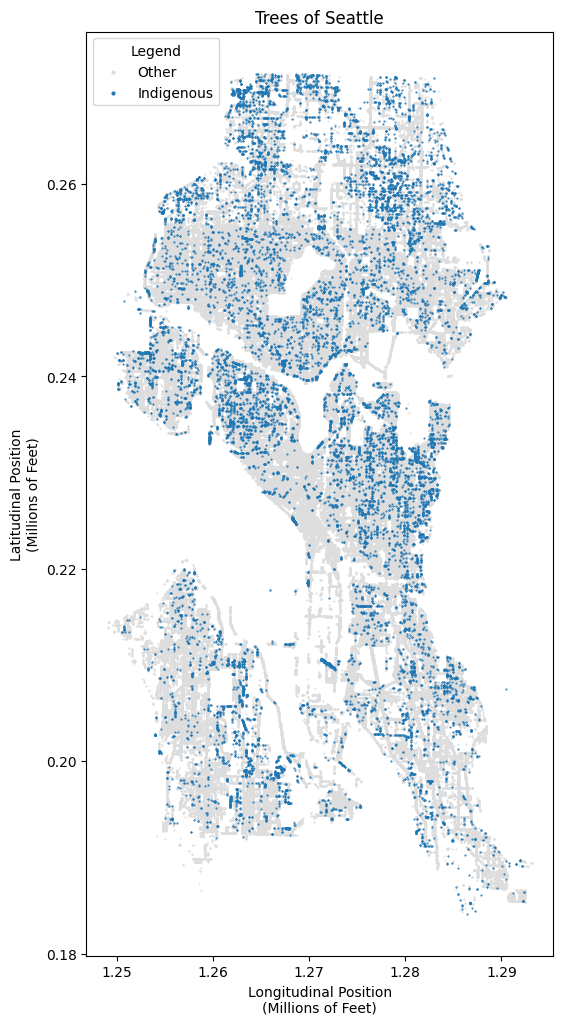

In [42]:
# Plot the location of trees in the city.

plot_trees('Trees of Seattle', [dftrees_ind], ['Indigenous'])

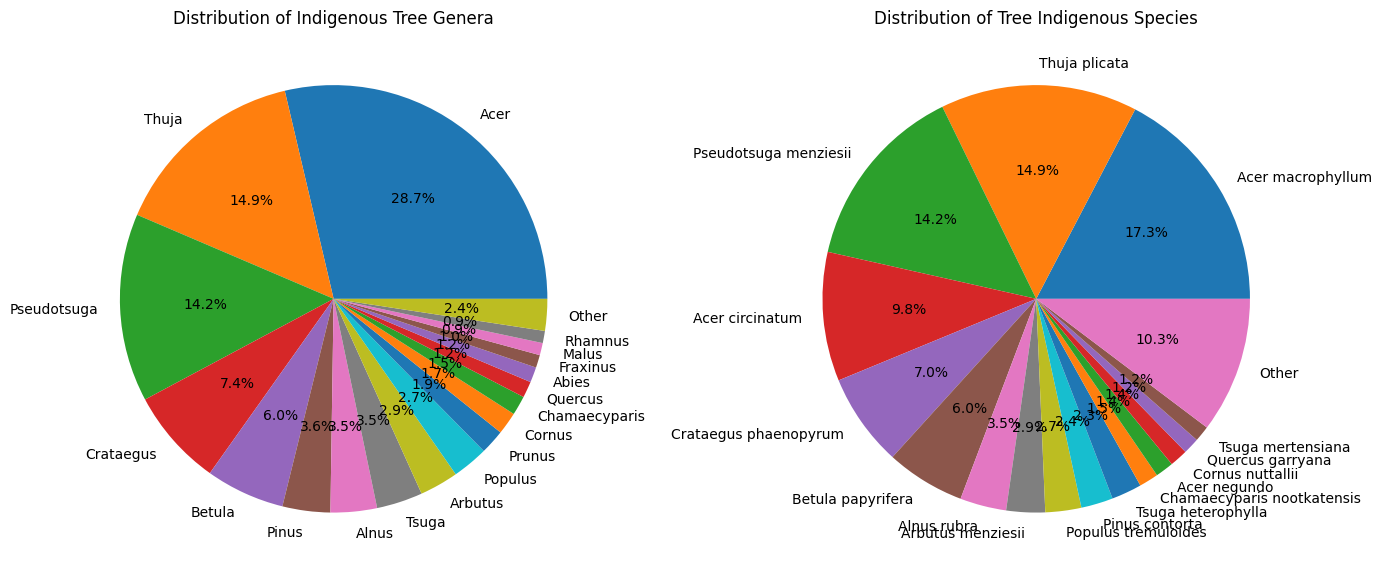

In [29]:
# Show the distribution of the various indigenous genera and species in Seattle.

fig, axes = plt.subplots(1, 2, figsize=(14, 7))

def plot_genera(ax, cutoff_fraction):
    indigenous_counts = dftrees_ind['genus'].value_counts()
    
    cum_fractions = (indigenous_counts / indigenous_counts.sum()).cumsum()
    before_cutoff = indigenous_counts[cum_fractions < cutoff_fraction]
    after_cutoff = indigenous_counts[cum_fractions >= cutoff_fraction]
    others = pd.Series([after_cutoff.sum()], index=['Other'])

    result_counts = pd.concat([before_cutoff, others])

    result_counts.plot(
        kind ='pie',
        autopct='%1.1f%%',
        legend=False,
        labels=result_counts.index,
        ax=ax,
    )

    ax.set_title('Distribution of Indigenous Tree Genera')
    
def plot_species(df, cutoff_fraction=0.90, title='Title', ax=None):
    indigenous_counts = df['scientificname'].value_counts()
    
    cum_fractions = (indigenous_counts / indigenous_counts.sum()).cumsum()
    before_cutoff = indigenous_counts[cum_fractions < cutoff_fraction]
    after_cutoff = indigenous_counts[cum_fractions >= cutoff_fraction]
    others = pd.Series([after_cutoff.sum()], index=['Other'])

    result_counts = before_cutoff
    if len(after_cutoff) > 0:
        result_counts = pd.concat([result_counts, others])

    axresult = result_counts.plot(
        kind ='pie',
        autopct='%1.1f%%',
        legend=False,
        labels=result_counts.index,
        ax=ax,
    )

    axresult.set_ylabel('')
    axresult.set_title(title)


plot_genera(axes[0], 0.98)
plot_species(dftrees_ind, cutoff_fraction=0.90, title='Distribution of Tree Indigenous Species', ax=axes[1])

plt.tight_layout()
plt.show()

# TODO - Clean up percents.


## Genus Acer - The Maples

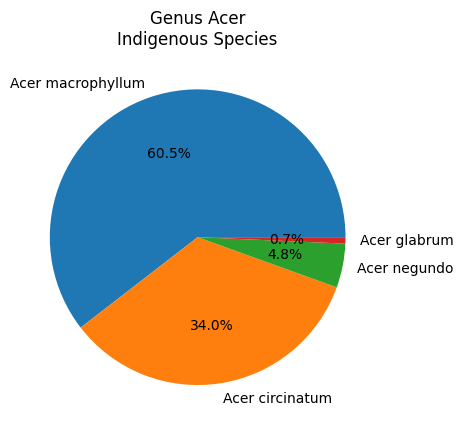

In [49]:
plot_species(dfacer_ind, cutoff_fraction=float('inf'), title='Genus Acer\nIndigenous Species')

Total Trees in Genus Acer: 4905

scientificname
Acer macrophyllum    2966
Acer circinatum      1669
Acer negundo          236
Acer glabrum           34
Name: count, dtype: int64


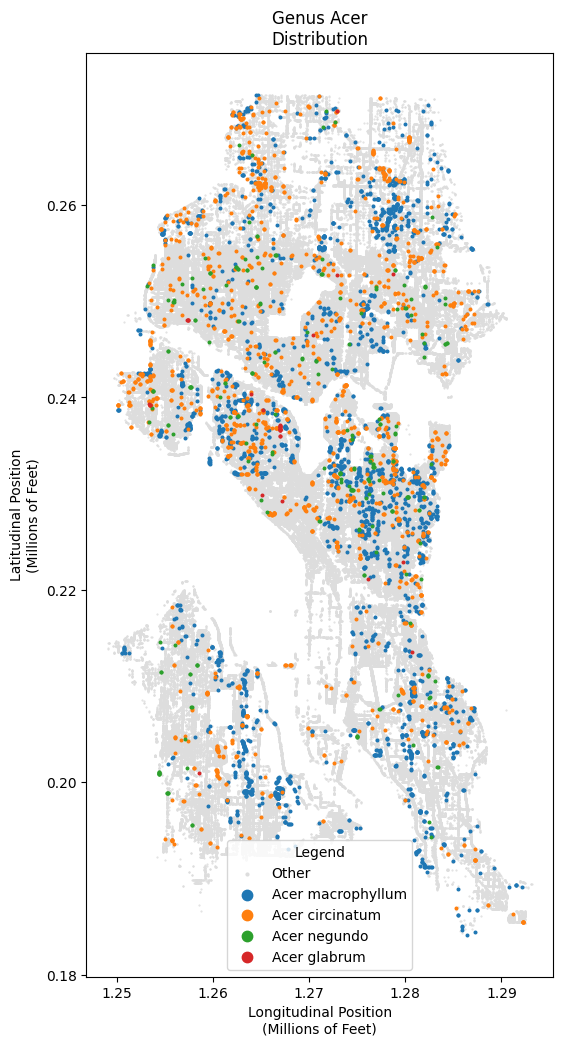

In [48]:
dfacer_ind = dftrees_ind[dftrees_ind['genus'] == 'Acer']
print('Total Trees in Genus Acer:', dfacer_ind['objectid'].count())
print()
print(dfacer_ind['scientificname'].value_counts())

dfacer_macro = dfacer_ind[dfacer_ind['scientificname'] == 'Acer macrophyllum']
dfacer_circ = dfacer_ind[dfacer_ind['scientificname'] == 'Acer circinatum']
dfacer_neg = dfacer_ind[dfacer_ind['scientificname'] == 'Acer negundo']
dfacer_glab = dfacer_ind[dfacer_ind['scientificname'] == 'Acer glabrum']

plot_trees(
    'Genus Acer\nDistribution',
    [dfacer_macro, dfacer_circ, dfacer_neg, dfacer_glab],
    ['Acer macrophyllum', 'Acer circinatum', 'Acer negundo', 'Acer glabrum'],
    primary_size=3.5,
)


## Acer macrophyllum - Bigleaf Maple, Oregon Maple

<p>
    <a href="./media/acer_macrophyllum/Acer_macrophyllum_kz06.jpg">
        <img src="./media/acer_macrophyllum/Acer_macrophyllum_kz06.jpg" alt="Big Leaf Maple Bark" width="180" />
        <!-- Krzysztof Ziarnek, Kenraiz (2020), [https://commons.wikimedia.org/wiki/File:Acer_macrophyllum_kz06.jpg](https://commons.wikimedia.org/wiki/File:Acer_macrophyllum_kz06.jpg), CC BY-SA 4.0 -->
    </a>
    <a href="./media/acer_macrophyllum/Acer_macrophyllum_1199.jpg">
        <img src="./media/acer_macrophyllum/Acer_macrophyllum_1199.jpg" alt="Big Leaf Maple Leaves" width="300" />
        <!-- Tony Perodeau (2006), [https://commons.wikimedia.org/wiki/File:Acer_macrophyllum_1199.jpg?uselang=en](https://commons.wikimedia.org/wiki/File:Acer_macrophyllum_1199.jpg?uselang=en), Public Domain -->
    </a>
</p>
<p>
    <a href="./media/acer_macrophyllum/Bigleaf_maple_(Acer_macrophyllum)_closeup_of_flowers.jpg">
        <img src="./media/acer_macrophyllum/Bigleaf_maple_(Acer_macrophyllum)_closeup_of_flowers.jpg" alt="Big Leaf Maple Flowers" width="300" />
        <!-- Kollibri1969 (2024), [https://commons.wikimedia.org/wiki/File:Bigleaf_maple_(Acer_macrophyllum)_closeup_of_flowers.jpg](https://commons.wikimedia.org/wiki/File:Bigleaf_maple_(Acer_macrophyllum)_closeup_of_flowers.jpg), CC BY-SA 4.0 -->
    </a>
    <a href="./media/acer_macrophyllum/Acer_macrophyllum_3158.jpg">
        <img src="./media/acer_macrophyllum/Acer_macrophyllum_3158.jpg" alt="Big Leaf Maple Seeds" width="300" />
        <!-- Walter Siegmund (2004), [https://commons.wikimedia.org/wiki/File:Acer_macrophyllum_3158.jpg](https://commons.wikimedia.org/wiki/File:Acer_macrophyllum_3158.jpg), CC BY-SA 3.0 -->
    </a>
</p>

Characteristics:

* Height: 100 ft
* Canopy: 50 ft
* Reproduction:
    - Angiosperm
    - Hermaphroditic
        - Blooms in Spring (April to May)
    - Pollinated by Insects
    - Produces Double Samara Fruits ("Helicopters")

References

* [Acer macrophyllum (Wikipedia)](https://en.wikipedia.org/wiki/Acer_macrophyllum)
* [WSU PNW - Washington State University NorthWest Plants Database system](https://pnwplants.wsu.edu/PlantDisplay.aspx?PlantID=7)